In [8]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Research_paper_recommendation_with_topic_analysis.pdf"

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove URLs
    text = re.sub('http[s]?://\S+', '', text)
    # Remove non-alpha characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove emoji and other symbols
    text = re.sub(':[^:]+:', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenization
    text = text.split()
    # Stopword removal
    text = [word for word in text if word not in stop_words]
    # Remove words with length less than 2
    text = [word for word in text if len(word) > 2]
    # Join words back to string
    text = ' '.join(text)
    return text

def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df

# Extract the data for the test document and create a DataFrame
test_document_data = pdfextraction(pdf_file)

# Save the test document DataFrame to a CSV file
test_document_data.to_csv("TestDocument.csv", index=False)

# Preprocess and lemmatize the extracted text
lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Apply lemmatization to the preprocessed text in the CSV file
lemmatized_csv_text = df['PDF'].apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

# Train the Doc2Vec model on the lemmatized CSV text
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(lemmatized_csv_text)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Infer document embeddings for the test document and CSV documents
test_document_vector = doc2vec_model.infer_vector(lemmatized_text.split())
csv_document_vectors = [doc2vec_model.infer_vector(doc.split()) for doc in lemmatized_csv_text]

# Compute similarity between the test document vector and CSV document vectors
similarity_scores = cosine_similarity([test_document_vector], csv_document_vectors)

# Get the most similar document(s) from the CSV file
most_similar_index = similarity_scores.argmax()
most_similar_document = df.iloc[most_similar_index]

# Print the most similar document(s) or perform further processing as needed
print("Most similar document:")
print(most_similar_document)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most similar document:
AUTHOR                    Yayati Gupta, Mahindra University
TITLES    Leveraging Network Similarity Measures for Rec...
PDF       leveraging network similarity measures recomme...
Name: 478, dtype: object


In [9]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import re
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Research_paper_recommendation_with_topic_analysis.pdf"

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove URLs
    text = re.sub('http[s]?://\S+', '', text)
    # Remove non-alpha characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove emoji and other symbols
    text = re.sub(':[^:]+:', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenization
    text = text.split()
    # Stopword removal
    text = [word for word in text if word not in stop_words]
    # Remove words with length less than 2
    text = [word for word in text if len(word) > 2]
    # Join words back to string
    text = ' '.join(text)
    return text

def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df

# Extract the data for the test document and create a DataFrame
test_document_data = pdfextraction(pdf_file)

# Save the test document DataFrame to a CSV file
test_document_data.to_csv("TestDocument.csv", index=False)

# Preprocess and lemmatize the extracted text
lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Apply lemmatization to the preprocessed text in the CSV file
lemmatized_csv_text = df['PDF'].apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

# Train the Doc2Vec model on the lemmatized CSV text
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(lemmatized_csv_text)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Infer document embeddings for the test document and CSV documents
test_document_vector = doc2vec_model.infer_vector(lemmatized_text.split())
csv_document_vectors = [doc2vec_model.infer_vector(doc.split()) for doc in lemmatized_csv_text]

top_k = 3

# Compute similarity between the test document vector and CSV document vectors
similarity_scores = cosine_similarity([test_document_vector], csv_document_vectors)[0]

# Get the indices of the top k similarity scores
top_k_indices = similarity_scores.argsort()[-top_k:][::-1]

# Get the top k most similar documents from the CSV file
top_k_similar_documents = df.iloc[top_k_indices]

# Print the most similar document(s) or perform further processing as needed
print(f"Top {top_k} most similar documents:")
print(top_k_similar_documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 3 most similar documents:
                                AUTHOR  \
478  Yayati Gupta, Mahindra University   
315                      Mala Saraswat   
312                      Mala Saraswat   

                                                TITLES  \
478  Leveraging Network Similarity Measures for Rec...   
315                      Enriching Topic Coherence.pdf   
312                        Analyzing emotion based.pdf   

                                                   PDF  
478  leveraging network similarity measures recomme...  
315  see discussions ats author ofiles public ation...  
312  see discussions ats author ofiles public ation...  


In [2]:
#top k unique, COSINE similarity


import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import re
import unicodedata
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Supervised Heterogeneous Domain Adaptation via Random Forests.pdf"


def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove URLs
    text = re.sub('http[s]?://\S+', '', text)
    # Remove non-alpha characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove emoji and other symbols
    text = re.sub(':[^:]+:', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenization
    text = text.split()
    # Stopword removal
    text = [word for word in text if word not in stop_words]
    # Remove words with length less than 2
    text = [word for word in text if len(word) > 2]
    # Join words back to string
    text = ' '.join(text)
    return text


def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df


# Extract the data for the test document and create a DataFrame
test_document_data = pdfextraction(pdf_file)

# Save the test document DataFrame to a CSV file
test_document_data.to_csv("TestDocument.csv", index=False)

# Preprocess and lemmatize the extracted text
lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Apply lemmatization to the preprocessed text in the CSV file
lemmatized_csv_text = df['PDF'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

# Train the Doc2Vec model on the lemmatized CSV text
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(lemmatized_csv_text)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Infer document embeddings for the test document and CSV documents
test_document_vector = doc2vec_model.infer_vector(lemmatized_text.split())
csv_document_vectors = [doc2vec_model.infer_vector(doc.split()) for doc in lemmatized_csv_text]

top_k = 5

# Compute similarity between the test document vector and CSV document vectors
similarity_scores = cosine_similarity([test_document_vector], csv_document_vectors)[0]

# Get the indices of the top k similarity scores
top_k_indices = similarity_scores.argsort()[-top_k:][::-1]

# Get the top k most similar documents from the CSV file
top_k_similar_documents = df.iloc[top_k_indices]

# Get the unique authors from the top k similar documents
unique_authors = top_k_similar_documents['AUTHOR'].unique()

# Print the top k unique authors
print(f"Top {top_k} unique authors:")
print(unique_authors)





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 5 unique authors:
['Sanatan Sukhija, Mahindra University' 'Dilip Singh Sisodia']


In [ ]:
# ... previous code ...

# Define the ground truth for the test document
ground_truth = ['Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Amit Saxena', 'Amita Jain', 'Animesh Chaturvedi', 'Ankita Jain, Mahindra University', 'Arun Chauhan', 'Aruna Malapati', 'Aruna Tiwari', 'Barsha Mitra', 'Bhanukiran Perabathini, Mahindra University', 'Bharghava Rajaram, Mahindra University', 'Deepak K T', 'Deepak Sharma, Bennett University', 'Devendra K Tayal', 'Dilip Singh Sisodia', 'dipanjan roy', 'Dipti Mishra, Mahindra University', 'Dr. Ashish Jain', 'Dr. Shikha Mehta', 'Dr.Manpreet Kaur', 'Dr.Rohit Beniwal', 'Dr.Ruchi Mittal', 'esha baidya kayal', 'Geeta Rani, Manipal University Jaipur', 'Himanee Bansal', 'Himanshu Mittal', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jayasri D, Mahindra University', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Krishna Asawa', 'Mala Saraswat', 'Manju_JaypeeTech', 'Manoranjan Mohanty', 'Minni Jain', 'Mukesh Prasad', 'Navneet Pratap Singh', 'Nikhil Tripathi', 'Nishchal K. Verma', 'Om Prakash Patel, Mahindra University', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Payal Khurana Batra', 'Pinaki Chakraborty', 'Prakash Chandra Sharma', 'Prof. B Subudhi', 'Rama Murthy Garimella, Mahindra University', 'Ramakrishan Maheshwari', 'Ramalinga Swamy Cheruku', 'ruchi sharma', 'Sambit Bakshi', 'Sanatan Sukhija, Mahindra University', 'Shikha Gupta', 'Sowmini Devi, Mahindra University', 'Sreedhar Madichetty, Mahindra University', 'Srishti Sharma, The Northcap University', 'Sulabh Tyagi, Jaypee Institute of Information Technology', 'Sunny Rai, Mahindra University', 'sushma hans', 'Tandra Pal', 'Tingwen Huang', 'Udit Satija', 'V. Ravi', 'Vaishali Soni, SGTB Khalsa College, University of Delhi', 'Venkata Dilip Kumar, Mahindra University', 'Venkata Rajesh Kumar Tavva, Mahindra University', 'Vidhi Khanduja', 'Yayati Gupta, Mahindra University', 'Yew-Soon Ong']

# Calculate the top-k accuracy
top_k_accuracy = len(set(ground_truth) & set(unique_authors[:top_k])) / top_k * 100

# Print the top-k accuracy
print("Top-K Accuracy:", top_k_accuracy)


In [21]:
# Define the ground truth for the test document
ground_truth = ['Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Amit Saxena', 'Amita Jain', 'Animesh Chaturvedi', 'Ankita Jain, Mahindra University', 'Arun Chauhan', 'Aruna Malapati', 'Aruna Tiwari', 'Barsha Mitra', 'Bhanukiran Perabathini, Mahindra University', 'Bharghava Rajaram, Mahindra University', 'Deepak K T', 'Deepak Sharma, Bennett University', 'Devendra K Tayal', 'Dilip Singh Sisodia', 'dipanjan roy', 'Dipti Mishra, Mahindra University', 'Dr. Ashish Jain', 'Dr. Shikha Mehta', 'Dr.Manpreet Kaur', 'Dr.Rohit Beniwal', 'Dr.Ruchi Mittal', 'esha baidya kayal', 'Geeta Rani, Manipal University Jaipur', 'Himanee Bansal', 'Himanshu Mittal', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jayasri D, Mahindra University', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Krishna Asawa', 'Mala Saraswat', 'Manju_JaypeeTech', 'Manoranjan Mohanty', 'Minni Jain', 'Mukesh Prasad', 'Navneet Pratap Singh', 'Nikhil Tripathi', 'Nishchal K. Verma', 'Om Prakash Patel, Mahindra University', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Payal Khurana Batra', 'Pinaki Chakraborty', 'Prakash Chandra Sharma', 'Prof. B Subudhi', 'Rama Murthy Garimella, Mahindra University', 'Ramakrishan Maheshwari', 'Ramalinga Swamy Cheruku', 'ruchi sharma', 'Sambit Bakshi', 'Sanatan Sukhija, Mahindra University', 'Shikha Gupta', 'Sowmini Devi, Mahindra University', 'Sreedhar Madichetty, Mahindra University', 'Srishti Sharma, The Northcap University', 'Sulabh Tyagi, Jaypee Institute of Information Technology', 'Sunny Rai, Mahindra University', 'sushma hans', 'Tandra Pal', 'Tingwen Huang', 'Udit Satija', 'V. Ravi', 'Vaishali Soni, SGTB Khalsa College, University of Delhi', 'Venkata Dilip Kumar, Mahindra University', 'Venkata Rajesh Kumar Tavva, Mahindra University', 'Vidhi Khanduja', 'Yayati Gupta, Mahindra University', 'Yew-Soon Ong']

# Calculate the Mean Reciprocal Rank (MRR)
mrr = 0.0
for author in ground_truth:
    if author in unique_authors:
        rank = np.where(unique_authors == author)[0][0] + 1  # Rank of the first occurrence of the author
        mrr += 1 / rank
mrr /= len(ground_truth)

# Calculate top-k accuracy
k = 3  # Choose the value of k
top_k_ground_truth = ground_truth[:k]  # Top-k ground truth authors
top_k_prediction = unique_authors[:k]  # Top-k predicted authors
top_k_accuracy = len(set(top_k_ground_truth) & set(top_k_prediction)) / k * 100

# Print the MRR and top-k accuracy
print("Mean Reciprocal Rank (MRR):", mrr)
print(f"Top-{k} Accuracy:", top_k_accuracy)


Mean Reciprocal Rank (MRR): 0.03211009174311927
Top-3 Accuracy: 33.33333333333333


In [13]:
#Top K accuracy
ground_truth = ['Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Amit Saxena', 'Amita Jain', 'Animesh Chaturvedi', 'Ankita Jain, Mahindra University', 'Arun Chauhan', 'Aruna Malapati', 'Aruna Tiwari', 'Barsha Mitra', 'Bhanukiran Perabathini, Mahindra University', 'Bharghava Rajaram, Mahindra University', 'Deepak K T', 'Deepak Sharma, Bennett University', 'Devendra K Tayal', 'Dilip Singh Sisodia', 'dipanjan roy', 'Dipti Mishra, Mahindra University', 'Dr. Ashish Jain', 'Dr. Shikha Mehta', 'Dr.Manpreet Kaur', 'Dr.Rohit Beniwal', 'Dr.Ruchi Mittal', 'esha baidya kayal', 'Geeta Rani, Manipal University Jaipur', 'Himanee Bansal', 'Himanshu Mittal', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jayasri D, Mahindra University', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Krishna Asawa', 'Mala Saraswat', 'Manju_JaypeeTech', 'Manoranjan Mohanty', 'Minni Jain', 'Mukesh Prasad', 'Navneet Pratap Singh', 'Nikhil Tripathi', 'Nishchal K. Verma', 'Om Prakash Patel, Mahindra University', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Payal Khurana Batra', 'Pinaki Chakraborty', 'Prakash Chandra Sharma', 'Prof. B Subudhi', 'Rama Murthy Garimella, Mahindra University', 'Ramakrishan Maheshwari', 'Ramalinga Swamy Cheruku', 'ruchi sharma', 'Sambit Bakshi', 'Sanatan Sukhija, Mahindra University', 'Shikha Gupta', 'Sowmini Devi, Mahindra University', 'Sreedhar Madichetty, Mahindra University', 'Srishti Sharma, The Northcap University', 'Sulabh Tyagi, Jaypee Institute of Information Technology', 'Sunny Rai, Mahindra University', 'sushma hans', 'Tandra Pal', 'Tingwen Huang', 'Udit Satija', 'V. Ravi', 'Vaishali Soni, SGTB Khalsa College, University of Delhi', 'Venkata Dilip Kumar, Mahindra University', 'Venkata Rajesh Kumar Tavva, Mahindra University', 'Vidhi Khanduja', 'Yayati Gupta, Mahindra University', 'Yew-Soon Ong']

# Calculate the top-k accuracy
top_k_accuracy = len(set(ground_truth) & set(unique_authors[:top_k])) / top_k * 100

# Print the top-k accuracy
print("Top-K Accuracy:", top_k_accuracy)


Top-K Accuracy: 66.66666666666666


In [14]:
#MRR accuracy
ground_truth = ['Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Aruna Tiwari', 'Barsha Mitra', 'Deepak K T', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Manoranjan Mohanty', 'Mukesh Prasad', 'Nishchal K. Verma', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Prof. B Subudhi', 'Sambit Bakshi', 'Tandra Pal', 'Tingwen Huang', 'Yew-Soon Ong', 'Amit Saxena', 'Amita Jain', 'Animesh Chaturvedi', 'Ankita Jain, Mahindra University', 'Arun Chauhan', 'Aruna Malapati', 'Aruna Tiwari', 'Barsha Mitra', 'Bhanukiran Perabathini, Mahindra University', 'Bharghava Rajaram, Mahindra University', 'Deepak K T', 'Deepak Sharma, Bennett University', 'Devendra K Tayal', 'Dilip Singh Sisodia', 'dipanjan roy', 'Dipti Mishra, Mahindra University', 'Dr. Ashish Jain', 'Dr. Shikha Mehta', 'Dr.Manpreet Kaur', 'Dr.Rohit Beniwal', 'Dr.Ruchi Mittal', 'esha baidya kayal', 'Geeta Rani, Manipal University Jaipur', 'Himanee Bansal', 'Himanshu Mittal', 'J. Balasubramaniam', 'Jagdish Bansal', 'Jayasri D, Mahindra University', 'Jian Wang', 'K.V. Sambasivarao', 'Kastuv Nag', 'Khaldoon Dhou', 'Krishna Asawa', 'Mala Saraswat', 'Manju_JaypeeTech', 'Manoranjan Mohanty', 'Minni Jain', 'Mukesh Prasad', 'Navneet Pratap Singh', 'Nikhil Tripathi', 'Nishchal K. Verma', 'Om Prakash Patel, Mahindra University', 'OmPrakash Kaiwartya', 'Pabitra Mitra', 'Payal Khurana Batra', 'Pinaki Chakraborty', 'Prakash Chandra Sharma', 'Prof. B Subudhi', 'Rama Murthy Garimella, Mahindra University', 'Ramakrishan Maheshwari', 'Ramalinga Swamy Cheruku', 'ruchi sharma', 'Sambit Bakshi', 'Sanatan Sukhija, Mahindra University', 'Shikha Gupta', 'Sowmini Devi, Mahindra University', 'Sreedhar Madichetty, Mahindra University', 'Srishti Sharma, The Northcap University', 'Sulabh Tyagi, Jaypee Institute of Information Technology', 'Sunny Rai, Mahindra University', 'sushma hans', 'Tandra Pal', 'Tingwen Huang', 'Udit Satija', 'V. Ravi', 'Vaishali Soni, SGTB Khalsa College, University of Delhi', 'Venkata Dilip Kumar, Mahindra University', 'Venkata Rajesh Kumar Tavva, Mahindra University', 'Vidhi Khanduja', 'Yayati Gupta, Mahindra University', 'Yew-Soon Ong']

# Calculate the reciprocal ranks
reciprocal_ranks = []
for author in ground_truth:
    rank = np.where(unique_authors[:top_k] == author)[0]
    if len(rank) > 0:
        reciprocal_rank = 1 / (rank[0] + 1)
        reciprocal_ranks.append(reciprocal_rank)

# Calculate the Mean Reciprocal Rank (MRR)
mrr = np.mean(reciprocal_ranks) * 100

# Print the MRR
print("MRR:", mrr)



MRR: 87.5


In [5]:
#MANHATTAN Similarity
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
import PyPDF2
import re
import unicodedata
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Supervised Heterogeneous Domain Adaptation via Random Forests.pdf"


def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove URLs
    text = re.sub('http[s]?://\S+', '', text)
    # Remove non-alpha characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove emoji and other symbols
    text = re.sub(':[^:]+:', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenization
    text = text.split()
    # Stopword removal
    text = [word for word in text if word not in stop_words]
    # Remove words with length less than 2
    text = [word for word in text if len(word) > 2]
    # Join words back to string
    text = ' '.join(text)
    return text


def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df


# Extract the data for the test document and create a DataFrame
test_document_data = pdfextraction(pdf_file)

# Save the test document DataFrame to a CSV file
test_document_data.to_csv("TestDocument.csv", index=False)

# Preprocess and lemmatize the extracted text
lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Apply lemmatization to the preprocessed text in the CSV file
lemmatized_csv_text = df['PDF'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

# Train the Doc2Vec model on the lemmatized CSV text
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(lemmatized_csv_text)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Infer document embeddings for the test document and CSV documents
test_document_vector = doc2vec_model.infer_vector(lemmatized_text.split())
csv_document_vectors = [doc2vec_model.infer_vector(doc.split()) for doc in lemmatized_csv_text]

top_k = 10

# Compute similarity between the test document vector and CSV document vectors using Manhattan distance
similarity_scores = manhattan_distances([test_document_vector], csv_document_vectors)[0]

# Get the indices of the top k similarity scores
top_k_indices = similarity_scores.argsort()[:top_k]

# Get the top k most similar documents from the CSV file
top_k_similar_documents = df.iloc[top_k_indices]

# Get the unique authors from the top k similar documents
unique_authors = top_k_similar_documents['AUTHOR'].unique()

# Print the top k unique authors
print(f"Top {top_k} unique authors:")
print(unique_authors)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 unique authors:
['Sanatan Sukhija, Mahindra University' 'Shikha Gupta' 'Minni Jain'
 'Nishchal K. Verma' 'Mukesh Prasad' 'Mala Saraswat' 'Aruna Malapati']


In [6]:
#euclidean similarity

import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import PyPDF2
import re
import unicodedata
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Research_paper_recommendation_with_topic_analysis.pdf"


def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    # Remove newline and carriage return characters
    text = text.replace('\n', ' ').replace('\r', ' ')
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove URLs
    text = re.sub('http[s]?://\S+', '', text)
    # Remove non-alpha characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove emoji and other symbols
    text = re.sub(':[^:]+:', '', text)
    # Convert to lower case
    text = text.lower()
    # Tokenization
    text = text.split()
    # Stopword removal
    text = [word for word in text if word not in stop_words]
    # Remove words with length less than 2
    text = [word for word in text if len(word) > 2]
    # Join words back to string
    text = ' '.join(text)
    return text


def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df


# Extract the data for the test document and create a DataFrame
test_document_data = pdfextraction(pdf_file)

# Save the test document DataFrame to a CSV file
test_document_data.to_csv("TestDocument.csv", index=False)

# Preprocess and lemmatize the extracted text
lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

# Apply lemmatization to the preprocessed text in the CSV file
lemmatized_csv_text = df['PDF'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

# Train the Doc2Vec model on the lemmatized CSV text
documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(lemmatized_csv_text)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# Infer document embeddings for the test document and CSV documents
test_document_vector = doc2vec_model.infer_vector(lemmatized_text.split())
csv_document_vectors = [doc2vec_model.infer_vector(doc.split()) for doc in lemmatized_csv_text]

top_k = 3

# Compute similarity between the test document vector and CSV document vectors using Euclidean distance
similarity_scores = euclidean_distances([test_document_vector], csv_document_vectors)[0]
#print(similarity_scores)
# Get the indices of the top k similarity scores
top_k_indices = similarity_scores.argsort()[:top_k]

# Get the top k most similar documents from the CSV file
top_k_similar_documents = df.iloc[top_k_indices]

# Get the unique authors from the top k similar documents
unique_authors = top_k_similar_documents['AUTHOR'].unique()

# Print the top k unique authors
print(f"Top {top_k} unique authors:")
print(unique_authors)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 3 unique authors:
['Pabitra Mitra' 'Shikha Gupta' 'Mala Saraswat']


The accuracies are: 
Cosine Similarity: 0.4383150953799486 
Manhattan Similarity: 0.3500664638340885 
Euclidean Similarity: 0.3532728413119912


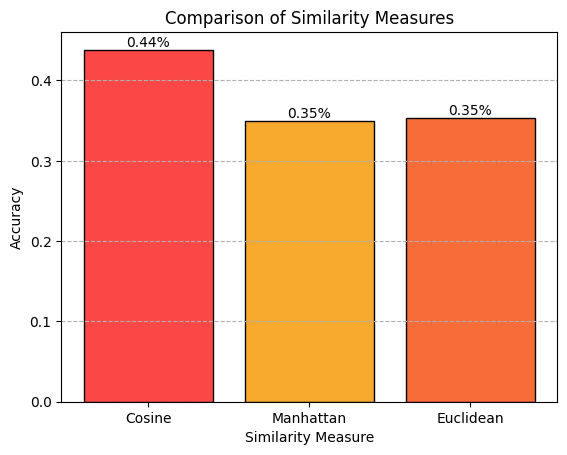

In [11]:
import matplotlib.pyplot as plt
#Compare accuracies and plot
cosine_similarity_scores = cosine_similarity([test_document_vector], csv_document_vectors)[0]
manhattan_similarity_scores = manhattan_distances([test_document_vector], csv_document_vectors)[0]
euclidean_similarity_scores = euclidean_distances([test_document_vector], csv_document_vectors)[0]

#print(euclidean_similarity_scores)
# Calculate accuracies
cosine_accuracy = (cosine_similarity_scores.max() / cosine_similarity_scores.sum()) * 100
manhattan_accuracy = (manhattan_similarity_scores.max() / manhattan_similarity_scores.sum()) * 100
euclidean_accuracy = (euclidean_similarity_scores.max() / euclidean_similarity_scores.sum()) * 100

print("The accuracies are: \nCosine Similarity:",cosine_accuracy, "\nManhattan Similarity:", manhattan_accuracy,"\nEuclidean Similarity:",euclidean_accuracy)
# Plotting the accuracies
similarity_measures = ['Cosine', 'Manhattan', 'Euclidean']
accuracies = [cosine_accuracy, manhattan_accuracy, euclidean_accuracy]

plt.bar(similarity_measures, accuracies, color=["#fc4747", "#f7aa2d", "#f76c39"], edgecolor='black')
plt.xlabel('Similarity Measure')
plt.ylabel('Accuracy')
plt.title('Comparison of Similarity Measures')
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{round(v, 2)}%", ha='center', va='bottom')
    
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import PyPDF2
import re
import unicodedata
import nltk
from transformers import BertModel, BertTokenizer
import torch
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    MAX_LEN = 512
    tokens = tokenizer.tokenize(text)
    chunks = [tokens[i:i + MAX_LEN] for i in range(0, len(tokens), MAX_LEN)]
    
    embeddings = []
    
    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=MAX_LEN)
        outputs = model(**inputs)
        chunk_embeddings = outputs.last_hidden_state.mean(1)
        embeddings.append(chunk_embeddings)
    
    embeddings = torch.cat(embeddings)
    return embeddings.mean(0).detach().numpy()

# Load the CSV dataset
csv_file = "C:\\Users\\Shashwat\\Desktop\\Shashu\\SEM 6\\Project Files\\Lemmatized_Output.csv"
df = pd.read_csv(csv_file)

# Path to your test PDF document
pdf_file = "C:\\Users\\Shashwat\\Downloads\\Research_paper_recommendation_with_topic_analysis.pdf"

def preprocess_text(text):
    if not isinstance(text, str):
        return ''
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub('<[^>]*>', '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(':[^:]+:', '', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if len(word) > 2]
    text = ' '.join(text)
    return text

def pdfextraction(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            pdf_text = ''
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                pdf_text += page.extract_text()
            pdf_content_list = [pdf_text]
            titles = [pdf_path.split('/')[-1]]
            author_name = ['Test Author']
    except KeyError as e:
        print(f"Error processing file '{pdf_path}': {e}")
        return pd.DataFrame()

    data = {'AUTHOR': author_name, 'TITLES': titles, 'PDF': pdf_content_list}
    df = pd.DataFrame(data)
    df['PDF'] = df['PDF'].map(lambda x: ' '.join(x) if isinstance(x, list) else x)
    df['PDF'] = df['PDF'].apply(preprocess_text)

    return df

test_document_data = pdfextraction(pdf_file)
test_document_data.to_csv("TestDocument.csv", index=False)

lemmatizer = WordNetLemmatizer()
pdf_text = str(test_document_data['PDF'].iloc[0])
tokens = word_tokenize(pdf_text)
lemmatized_text = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

lemmatized_csv_text = df['PDF'].apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]) if isinstance(x, (str, bytes)) else '')

test_document_vector = get_bert_embeddings(lemmatized_text)
csv_document_vectors = [get_bert_embeddings(doc) for doc in lemmatized_csv_text]

top_k = 3

similarity_scores = cosine_similarity([test_document_vector], csv_document_vectors)[0]
top_k_indices = similarity_scores.argsort()[-top_k:][::-1]
top_k_similar_documents = df.iloc[top_k_indices]

print(f"Top {top_k} most similar documents:")
print(top_k_similar_documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashwat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification 

In [16]:
def calculate_overlap(doc1, doc2):
    # Convert documents to sets of words
    words_doc1 = set(doc1.split())
    words_doc2 = set(doc2.split())
    
    # Calculate overlap
    overlap = words_doc1.intersection(words_doc2)
    
    # Return percentage of overlap (intersection over union)
    return len(overlap) / len(words_doc1.union(words_doc2))
top_k_similar_texts = lemmatized_csv_text[top_k_indices]

overlap_scores = []

# Compute the overlap between the test document and each of the top k similar documents
for similar_text in top_k_similar_texts:
    overlap_score = calculate_overlap(lemmatized_text, similar_text)
    overlap_scores.append(overlap_score)

# Print the overlap scores
for i, score in enumerate(overlap_scores):
    
    print(f"Overlap score between test document and document {top_k_indices[i]}: {score}")

Overlap score between test document and document 131: 0.12882298424467098
Overlap score between test document and document 601: 0.13356461405030357
Overlap score between test document and document 320: 0.02190721649484536


In [17]:
import seaborn as sns
sns.d

In [3]:
!pip install gensim

     ---------------------------------------- 23.9/23.9 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 56.8/56.8 kB 1.5 MB/s eta 0:00:00
